            A          B          C
0   55.568993  57.008849  77.619507
1   53.662418  61.865284  76.613786
2   57.425585  54.848515  78.275765
3   58.554040  53.683545  76.886711
4   55.875077  55.557772  74.375909
5   59.975701  58.829856  81.410583
6   58.309153  58.101867  84.179464
7   52.378210  58.419293  77.263930
8   56.072821  56.547105  75.202880
9   54.149126  58.380009  84.035827
10  58.933801  60.349722  81.475650
11  52.195802  55.208920  83.854417
12  50.530885  60.222889  83.030609
13  59.571315  54.509656  76.785821
14  51.654155  59.300036  76.088811
15  52.607974  59.670923  80.753452
16  56.082760  58.914669  79.909691
17  58.832735  60.977265  82.175145
18  50.318368  56.708925  78.047560
19  57.016340  59.938410  84.301939
KW test p-value: 8.038251510150849e-10
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-

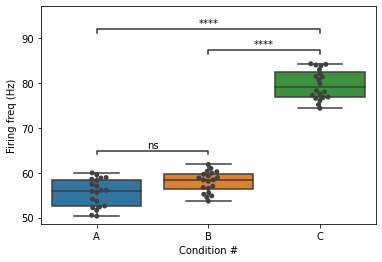

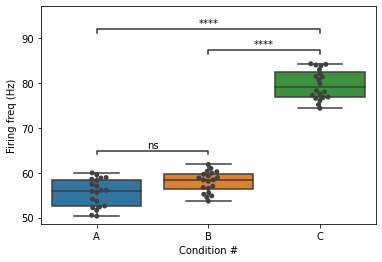

In [2]:
#Import the modules we need
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stat
from statannot import add_stat_annotation

#Where is the file ?
file = 'D:/python course/stats/firing_dataset.xlsx'

#Generate dataframe based on excel file
dataset = pd.read_excel(file,header=0,index_col=0)
print (dataset)

#Create a figure
figure, subplot = plt.subplots(1,1)

#Add axis labels
subplot.set_ylabel('Firing freq (Hz)')
subplot.set_xlabel('Condition #')
                   
#Do the boxplot
sn.boxplot(data=dataset, ax=subplot)

#Add the swarmplot on top (i.e. the individuals dots)
sn.swarmplot(data=dataset, ax=subplot,color='0.25')

#Do Kruskal Wallis test on the 3 distributions
KW_test=stat.kruskal(dataset.loc[:,'A'],
                     dataset.loc[:,'B'],
                     dataset.loc[:,'C'])

print ('KW test p-value: {}'.format(KW_test[1]))

#Do pairwise Mann Whitney test 
subplot, MW_test = add_stat_annotation(subplot,data=dataset,
                                       box_pairs=[('A','B'),('A','C'),('B','C')],
                                       test='Mann-Whitney',
                                       comparisons_correction='bonferroni',
                                       text_format='star',
                                       loc='inside')

plt.show()